In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def read_data():
  real_df=pd.read_csv("/content/users.csv")
  fake_df=pd.read_csv("/content/fusers.csv")
  x=pd.concat([real_df,fake_df])
  y=len(fake_df)*[0]+len(real_df)*[1]
  return x,y

In [3]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = { name : i for i, name in lang_list }
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)
    feature_columns_to_use = ['id','statuses_count','followers_count','friends_count','lang_code','favourites_count','listed_count']
    x=x.loc[:,feature_columns_to_use]
    return x

In [4]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)

    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)

    roc_auc = sklearn.metrics.auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [6]:
print("reading datasets.....\n")
x,y=read_data()
x.head(5)

reading datasets.....



,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [7]:
x=extract_features(x)
print(x.columns)
print(x.describe())

Index(['id', 'statuses_count', 'followers_count', 'friends_count', 'lang_code',
       'favourites_count', 'listed_count'],
      dtype='object')
                 id  statuses_count  followers_count  friends_count  \
count  2.818000e+03     2818.000000      2818.000000    2818.000000   
mean   5.374889e+08     1672.198368       371.105039     395.363023   
std    2.977005e+08     4884.669157      8022.631339     465.694322   
min    3.610511e+06        0.000000         0.000000       0.000000   
25%    3.620867e+08       35.000000        17.000000     168.000000   
50%    6.162253e+08       77.000000        26.000000     306.000000   
75%    6.177673e+08     1087.750000       111.000000     519.000000   
max    1.391998e+09    79876.000000    408372.000000   12773.000000   

         lang_code  favourites_count  listed_count  
count  2818.000000       2818.000000   2818.000000  
mean      2.851313        234.541164      2.818666  
std       1.992950       1445.847248     23.480430  
mi

In [8]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[ 2.63963676e-01, -3.34583855e-01, -4.11619131e-02, ...,
        -9.23296640e-01, -1.58061691e-01, -1.21252536e-01],
       [-1.48481569e+00, -3.35750841e-03,  4.71793252e+01, ...,
         1.08452837e+00, -1.55337276e-01,  3.09416245e+01],
       [-1.56952213e+00,  5.26968854e-01, -2.82107904e-02, ...,
        -9.23296640e-01, -1.54656172e-01, -7.95013574e-02],
       ...,
       [-4.66356080e-02, -2.74894318e-01, -2.25446742e-02, ...,
         1.08452837e+00, -1.56699483e-01,  4.57521791e-02],
       [ 2.82637340e+00, -3.40249303e-01, -4.26651684e-02, ...,
        -9.23296640e-01, -1.58061691e-01, -1.21252536e-01],
       [ 2.62224944e-01, -3.25681009e-01, -4.05837380e-02, ...,
        -9.23296640e-01, -1.58061691e-01, -1.21252536e-01]])

In [11]:
X_test

array([[-0.92185072,  1.67260329,  0.03330704, ...,  1.08452837,
        -0.14580182,  0.33801043],
       [-0.62705246,  1.07388688,  0.07296986, ...,  1.08452837,
         1.47726833,  0.12925454],
       [-1.54178096,  0.0253744 , -0.03098603, ...,  1.08452837,
        -0.14580182, -0.07950136],
       ...,
       [ 0.26201651, -0.33316749, -0.04093064, ..., -0.92329664,
        -0.15806169, -0.12125254],
       [-0.72887819, -0.28136912, -0.03792413, ...,  1.08452837,
        -0.15806169, -0.12125254],
       [ 0.2659276 , -0.33600022, -0.04058374, ..., -0.92329664,
        -0.15806169, -0.12125254]])

In [12]:
from sklearn.svm import SVC

# Create the SVM Classifier
clf = SVC()

# Train the model
trained_model = clf.fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
acc_train=sklearn.metrics.accuracy_score(y_train, trained_model.predict(X_train))
acc_train

0.945430346051464

In [15]:
acc_train*100

94.5430346051464

In [16]:
acc_test=sklearn.metrics.accuracy_score(y_test, y_pred)
acc_test

0.9432624113475178

In [17]:
acc_test*100

94.32624113475178

In [18]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[266,   2],
       [ 30, 266]])

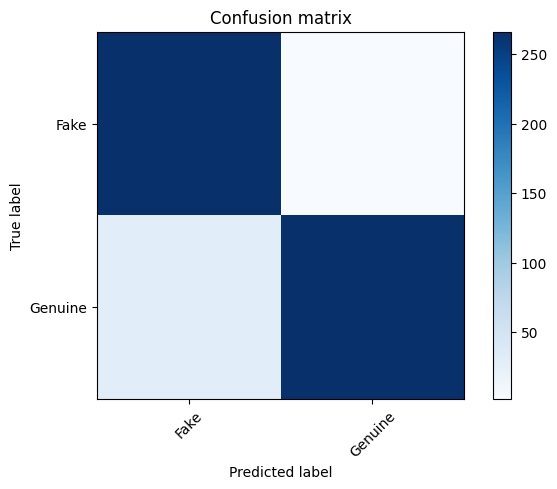

In [19]:
plot_confusion_matrix(cm)

In [20]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[0.99253731, 0.00746269],
       [0.10135135, 0.89864865]])

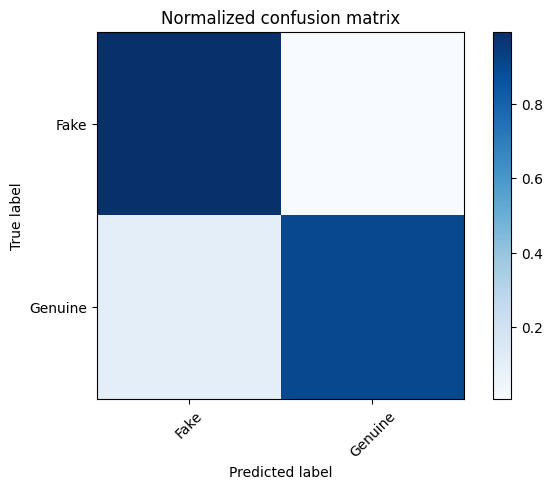

In [21]:
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

False Positive rate:  [0.         0.00746269 1.        ]
True Positive rate:  [0.         0.89864865 1.        ]


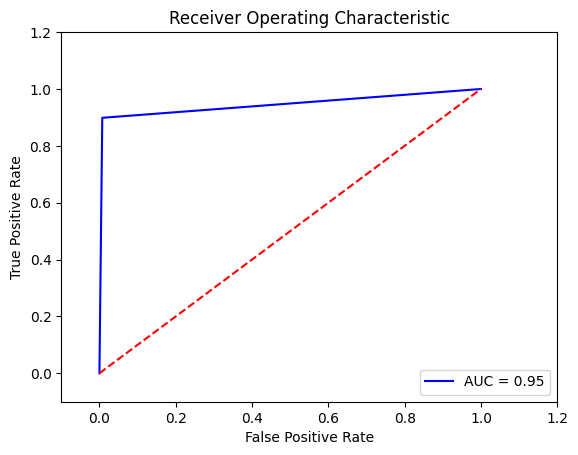

In [22]:
plot_roc_curve(y_test, y_pred)

In [23]:
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.99      0.94       268
     Genuine       0.99      0.90      0.94       296

    accuracy                           0.94       564
   macro avg       0.95      0.95      0.94       564
weighted avg       0.95      0.94      0.94       564



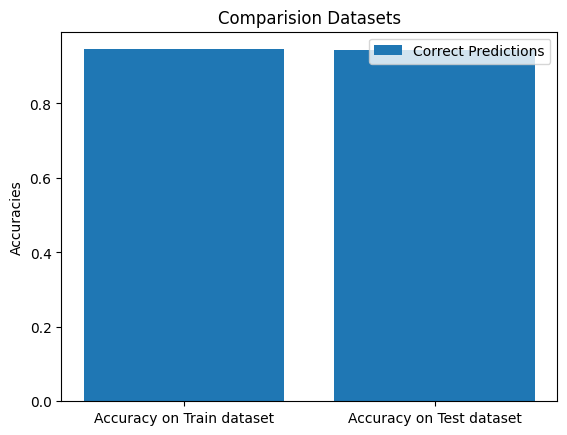

In [24]:
accuracy_model=['Accuracy on Train dataset','Accuracy on Test dataset']
accuracy=[sklearn.metrics.accuracy_score(y_train, trained_model.predict(X_train)),sklearn.metrics.accuracy_score(y_test, y_pred)]

xpos = np.arange(len(accuracy_model))
plt.bar(xpos,accuracy, label="Correct Predictions")

plt.xticks(xpos,accuracy_model)
plt.ylabel("Accuracies")
plt.title('Comparision Datasets')
plt.legend()